<h1 style="color: blue;">ZOMATO DATA ANALYSIS</h1>

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("zomato_data.csv")

In [3]:
rows, columns = df.shape
print(f"rows:{rows}  columns:{columns}")

rows:148  columns:7


In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
# Changing values in rate columns by removing "/5" in all the values for better analysis

def handleRate(value):
    value = str(value).split("/")
    value = value[0];
    return float(value)

df["rate"] = df["rate"].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


<h1 style="color: blue;">What type of resturants do majority of customers order from ?</h1>
<h2 style="color: blue;">Conclusion: Dining</h2>

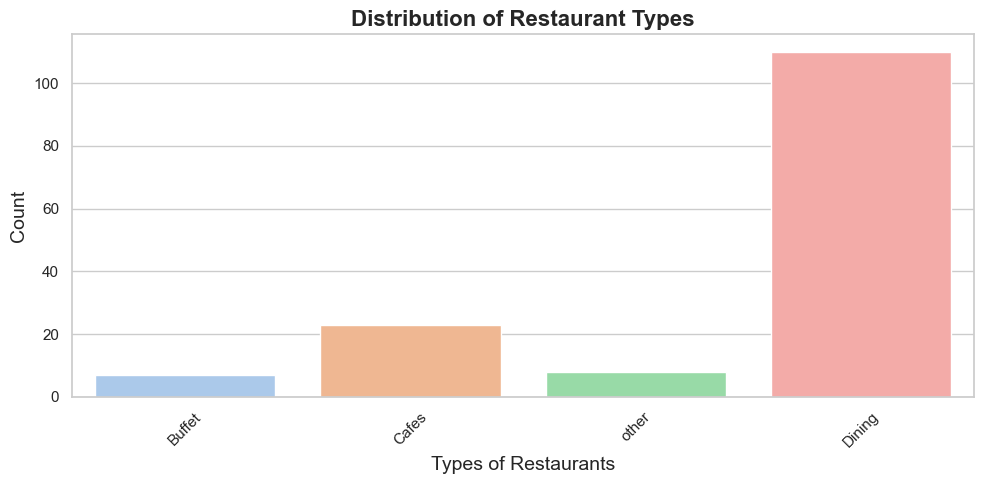

In [7]:
# Set the style
sns.set(style="whitegrid")

# Create the countplot with a dark palette
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=df["listed_in(type)"], hue=df["listed_in(type)"], palette="pastel", legend=False)

# Add titles and labels
plt.title("Distribution of Restaurant Types", fontsize=16, fontweight="bold")
plt.xlabel("Types of Restaurants", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Saving graph in local system
plt.savefig("types_of_restaurants.png", dpi=300)

# Show the plot
plt.tight_layout()
plt.show()

<h1 style="color: blue;">How many votes has each type of resturant received from customer ?</h1>
<h2 style="color: blue;">Conclusion: Dining Resturants</h2>

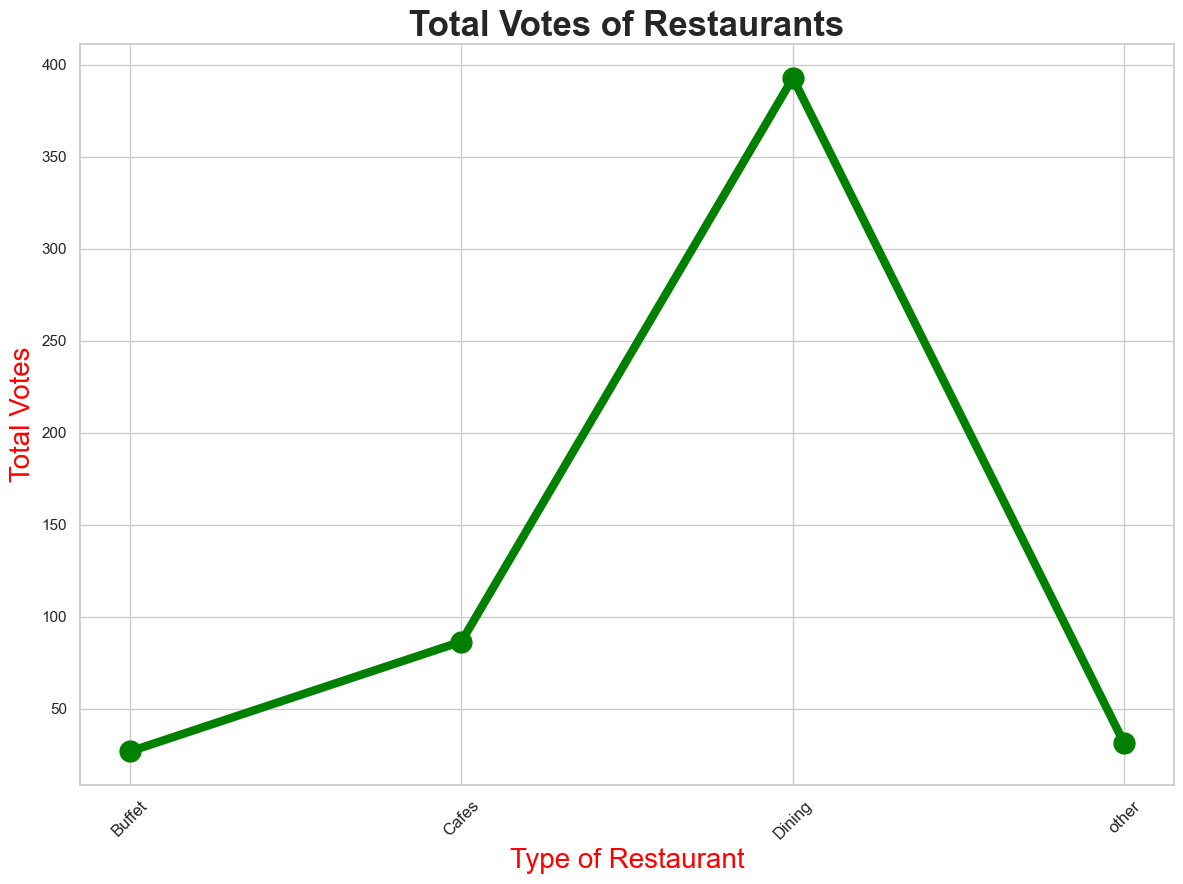

In [8]:
# Group the data
grouped_data = df.groupby("listed_in(type)")["rate"].sum()

# Create a DataFrame from the grouped data
result = pd.DataFrame({"votes": grouped_data})

# Set the figure size
plt.figure(figsize=(12,9))

# Plot the data
plt.plot(result.index, result["votes"], color="green", marker="o", markersize=15, linewidth=6)

# Add titles and labels with improved formatting
plt.title("Total Votes of Restaurants", fontsize=25, fontweight="bold")
plt.xlabel("Type of Restaurant", fontsize=20, color="red")
plt.ylabel("Total Votes", fontsize=20, color="red")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Saving graph in local system
plt.savefig("total_votes.png", dpi=300)

# Show the plot
plt.tight_layout()
plt.show()

<h1 style="color: blue;">Rating Analysis</h1>
<h2 style="color: blue;">Conclusion: Most ratings are from 3.75 to 4.00 which is good</h2>

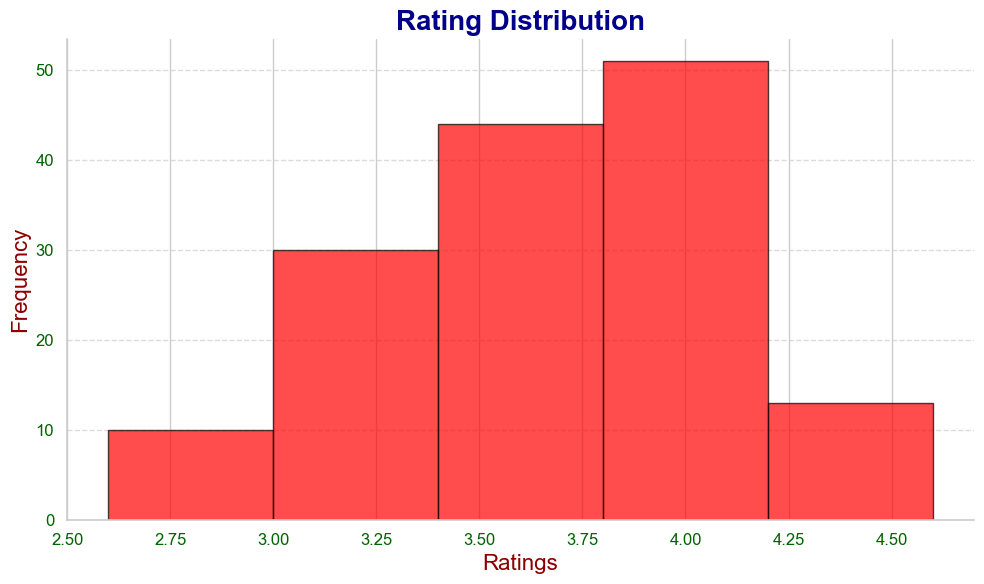

In [9]:
# Create the histogram with customizations
plt.figure(figsize=(10,6))
plt.hist(df["rate"], bins=5, color="red", edgecolor="black", alpha=0.7)

# Add titles and labels with improved formatting
plt.title("Rating Distribution", fontsize=20, fontweight="bold", color="darkblue")
plt.xlabel("Ratings", fontsize=16, color="darkred")
plt.ylabel("Frequency", fontsize=16, color="darkred")

# Customize the x and y ticks for clarity
plt.xticks(fontsize=12, color="darkgreen")
plt.yticks(fontsize=12, color="darkgreen")

# Add grid for the y-axis only, to make the histogram cleaner
plt.grid(True, axis="y", linestyle="--", alpha=0.7)

# Add a box around the plot for a professional finish
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_linewidth(1.2)
plt.gca().spines["bottom"].set_linewidth(1.2)

# Saving graph in local system
plt.savefig("Rating_analysis.png", dpi=300)

# Show the plot
plt.tight_layout()
plt.show()

<h1 style="color: blue;">Zomato observed most couple orders. What is there average spent ?</h1>
<h2 style="color: blue;">Conclusion: Average order spent is rs. 300</h2>

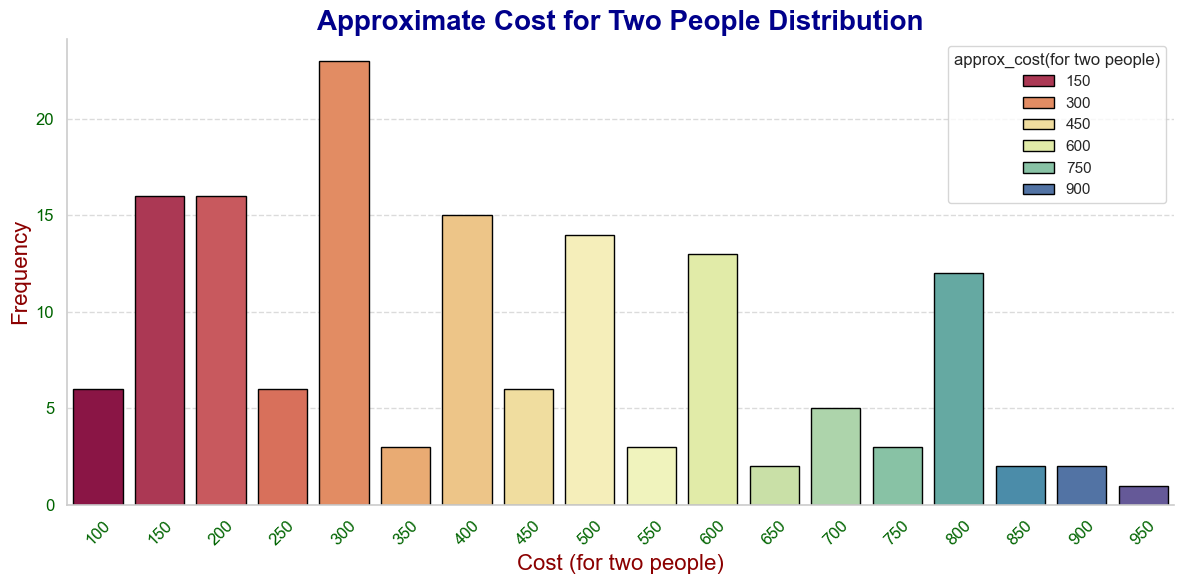

In [10]:
# Set figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create the countplot with a vibrant color palette
coupleData = df["approx_cost(for two people)"]
sns.countplot(x=coupleData, hue=coupleData, palette="Spectral", edgecolor="black")

# Add titles and labels with improved formatting
plt.title("Approximate Cost for Two People Distribution", fontsize=20, fontweight="bold", color="darkblue")
plt.xlabel("Cost (for two people)", fontsize=16, color="darkred")
plt.ylabel("Frequency", fontsize=16, color="darkred")

# Customize the x and y ticks for clarity
plt.xticks(fontsize=12, color="darkgreen", rotation=45)
plt.yticks(fontsize=12, color="darkgreen")

# Add grid lines for better readability
plt.grid(True, axis="y", linestyle="--", alpha=0.7)

# Add a box around the plot for a clean, professional look
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_linewidth(1.2)
plt.gca().spines["bottom"].set_linewidth(1.2)

# Saving graph in local system
plt.savefig("Rating_analysis.png", dpi=300)

# Show the plot
plt.tight_layout()
plt.show()

<h1 style="color: blue;">Order comparision between offline and online orders. </h1>
<h2 style="color: blue;">Conclusion: People mostly prefer offline mode in dining restaurants and online mode in cafes</h2>

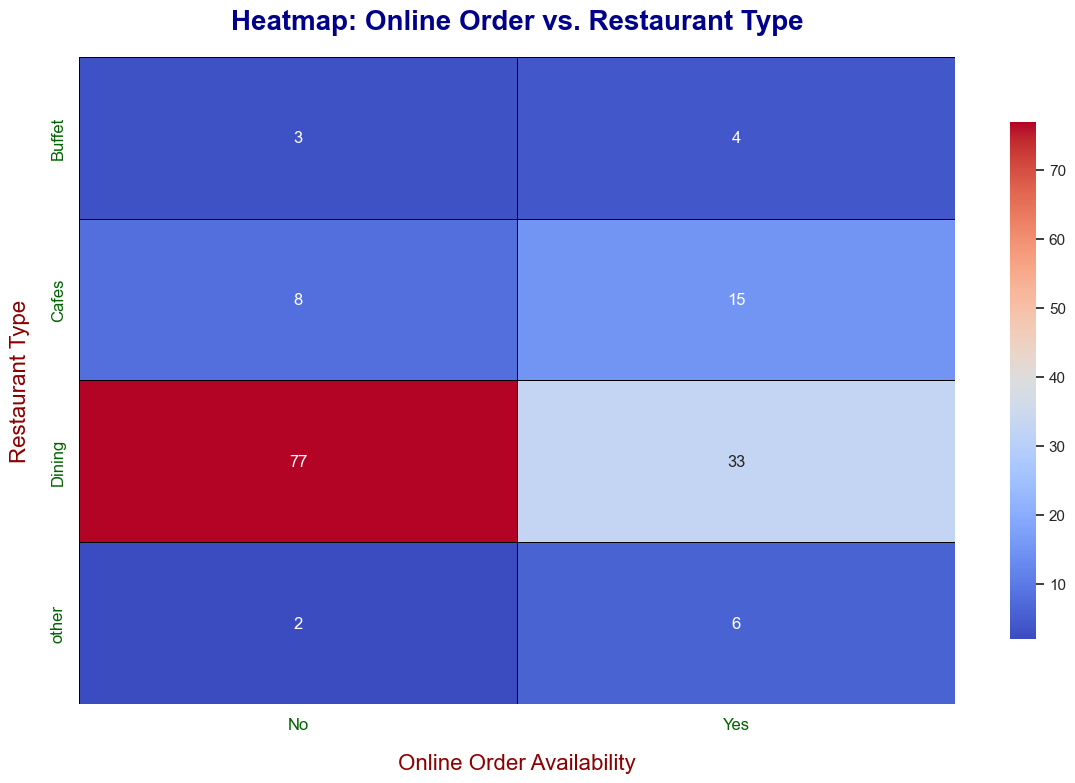

In [11]:

# Create the pivot table
pivot_table = df.pivot_table(index="listed_in(type)", columns="online_order", aggfunc="size", fill_value=0)

# Set figure size and style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create the heatmap with a gradient color palette
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5, linecolor="black", cbar_kws={"shrink": 0.8})

# Add a title and labels with improved formatting
plt.title("Heatmap: Online Order vs. Restaurant Type", fontsize=20, fontweight="bold", color="darkblue", pad=20)
plt.xlabel("Online Order Availability", fontsize=16, color="darkred", labelpad=15)
plt.ylabel("Restaurant Type", fontsize=16, color="darkred", labelpad=15)

# Customize the x and y ticks for clarity
plt.xticks(fontsize=12, color="darkgreen")
plt.yticks(fontsize=12, color="darkgreen")

# Add grid for y-axis to separate categories clearly
plt.grid(True, axis="y", linestyle="--", alpha=0.5)

# Remove top and right spines for a cleaner look
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Saving graph in local system
plt.savefig("Heatmap.png", dpi=300)

# Show the plot
plt.tight_layout()
plt.show()

<h1 style="color: blue;">End of the Project</h1>
<h1 style="color: blue;">Thank you !</h1>